# Netflix Titles Data Analysis

## Introduction

This work embarked on a comprehensive exploratory data analysis (EDA) of a Netflix titles dataset, aiming to uncover insights and patterns within Netflix's vast content catalog. Through a series of visualizations and analyses, we delved into various aspects of the dataset, including the distribution of movies vs. TV shows, the number of titles added per year, the distribution of show ratings, trends in release years, and the country-wise distribution of titles. These initial analyses provided a broad overview of the content landscape on Netflix, highlighting the platform's content diversity and growth trends over time.

Further deepening our exploration, we conducted a Genre Analysis to identify the most prevalent genres within the Netflix catalog, revealing insights into Netflix's content strategy and the popularity of different types of content. This analysis highlighted the platform's emphasis on genres like documentaries, dramas, and comedies, underscoring its commitment to catering to a wide array of viewer preferences.

We further explored the dataset through Text Analysis of Titles and Descriptions, utilizing techniques like TF-IDF for keyword extraction and generating a word cloud to visualize the most significant themes and subjects across Netflix titles. This analysis shed light on the thematic elements that characterize the Netflix catalog, providing a basis for content discovery and recommendation.

Lastly, we performed a Sentiment Analysis on the titles' descriptions to categorize the emotional tone conveyed by these summaries into positive, neutral, or negative sentiments. The results of this analysis offered insights into the overall mood of the content available on Netflix, highlighting the platform's strategy in appealing to viewers through the emotional framing of content descriptions.

Overall, this work provided a multi-faceted view of the Netflix content catalog, leveraging data visualization and analysis techniques to uncover insights into content trends, preferences, and strategies. These analyses not only contribute to a deeper understanding of Netflix's content ecosystem but also demonstrate the potential of data-driven approaches in enhancing content recommendation and personalization efforts.

## EDA

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'netflix_titles.csv'
netflix_titles_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_titles_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

The file netflix_titles.csv contains the following columns:

- show_id: A unique id for each show.
- type: The type of the title, e.g., Movie or TV Show.
- title: The title of the show.
- director: The director of the show.
- cast: Cast members involved in the show.
- country: The country where the show was produced.
- date_added: The date the show was added to Netflix.
- release_year: The year the show was released.
- rating: The rating of the show.
- duration: The duration of the show, in minutes for movies and seasons for TV shows.
- listed_in: Categories the show is listed under.
- description: A brief description of the show.

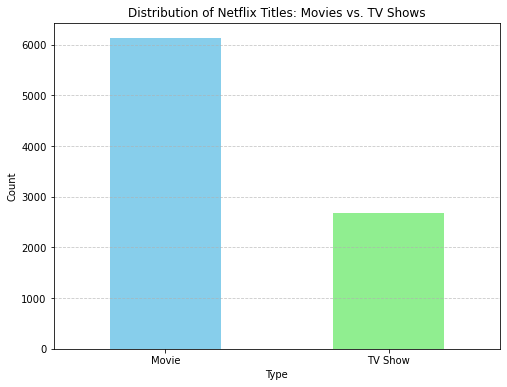

In [5]:
import matplotlib.pyplot as plt

# Count the number of movies and TV shows
type_counts = netflix_titles_df['type'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Netflix Titles: Movies vs. TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The chart above displays the distribution of Netflix titles between Movies and TV Shows. As observed, there's a distinct count for each type, which helps in understanding the composition of Netflix's catalog. 

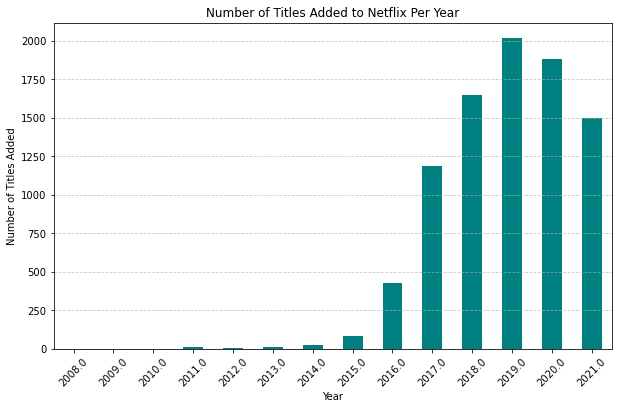

In [6]:
# Extracting year from 'date_added' column
netflix_titles_df['year_added'] = pd.to_datetime(netflix_titles_df['date_added']).dt.year

# Counting the number of titles added each year
titles_per_year = netflix_titles_df['year_added'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
titles_per_year.plot(kind='bar', color='teal')
plt.title('Number of Titles Added to Netflix Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The chart above illustrates the number of titles added to Netflix per year. It shows a trend over the years, with the data sorted chronologically. You can observe how the volume of titles added has changed over time.

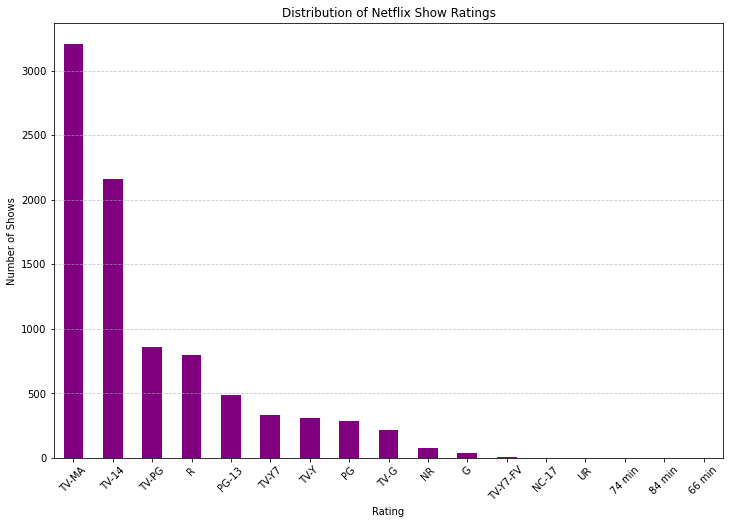

In [7]:
# Counting the number of shows per rating
ratings_counts = netflix_titles_df['rating'].value_counts()

# Plotting
plt.figure(figsize=(12, 8))
ratings_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Netflix Show Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The chart above shows the distribution of Netflix show ratings. It indicates the number of shows associated with each rating category, providing insights into the content's maturity level and audience suitability across the Netflix catalog.

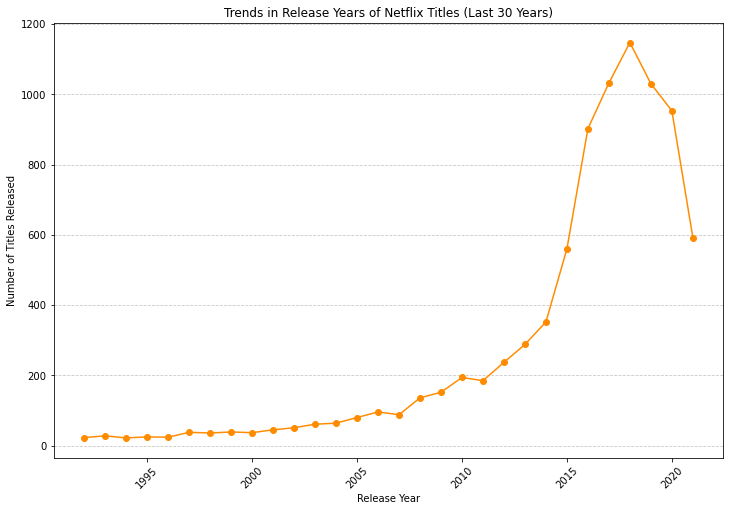

In [8]:
# Counting the number of titles released each year
release_year_counts = netflix_titles_df['release_year'].value_counts().sort_index()

# Due to a large number of unique years, we'll focus on a more recent range for clarity
# Let's focus on titles released in the last 30 years for a more readable chart
recent_years = release_year_counts[release_year_counts.index > (release_year_counts.index.max() - 30)]

# Plotting
plt.figure(figsize=(12, 8))
recent_years.plot(kind='line', color='darkorange', marker='o')
plt.title('Trends in Release Years of Netflix Titles (Last 30 Years)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

The chart above visualizes the trends in the release years of Netflix titles over the last 30 years, highlighting the number of titles released each year within this timeframe. It shows how the volume of content has evolved, providing insights into the growth or shifts in the types of content Netflix has been acquiring or producing

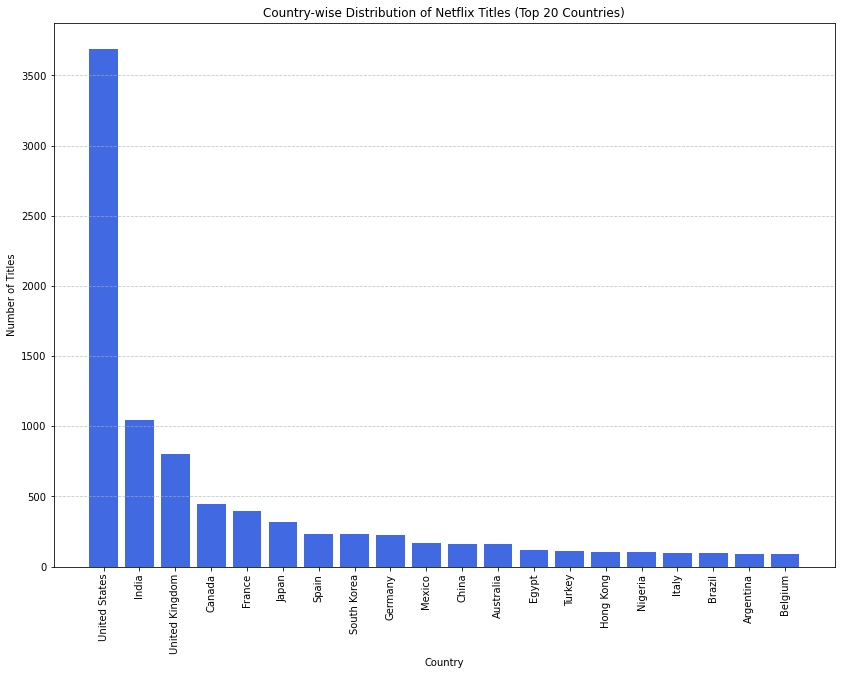

In [9]:
# Preparing data: Splitting countries where multiple countries are listed for a title
country_series = netflix_titles_df['country'].str.split(', ', expand=False).dropna()
country_flat_list = [country for sublist in country_series for country in sublist]

# Counting the occurrences of each country
from collections import Counter
country_counts = Counter(country_flat_list)

# Converting to DataFrame for easier handling and sorting
country_counts_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Count']).sort_values(by='Count', ascending=False)

# Selecting top 20 countries for clarity in visualization
top_countries = country_counts_df.head(20)

# Plotting
plt.figure(figsize=(14, 10))
plt.bar(top_countries['Country'], top_countries['Count'], color='royalblue')
plt.title('Country-wise Distribution of Netflix Titles (Top 20 Countries)')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The chart above presents the country-wise distribution of Netflix titles, focusing on the top 20 countries with the highest number of titles. This visualization helps to understand which countries' productions are most prevalent on Netflix, offering insights into the platform's geographic diversity in content.

## Genre Analysis

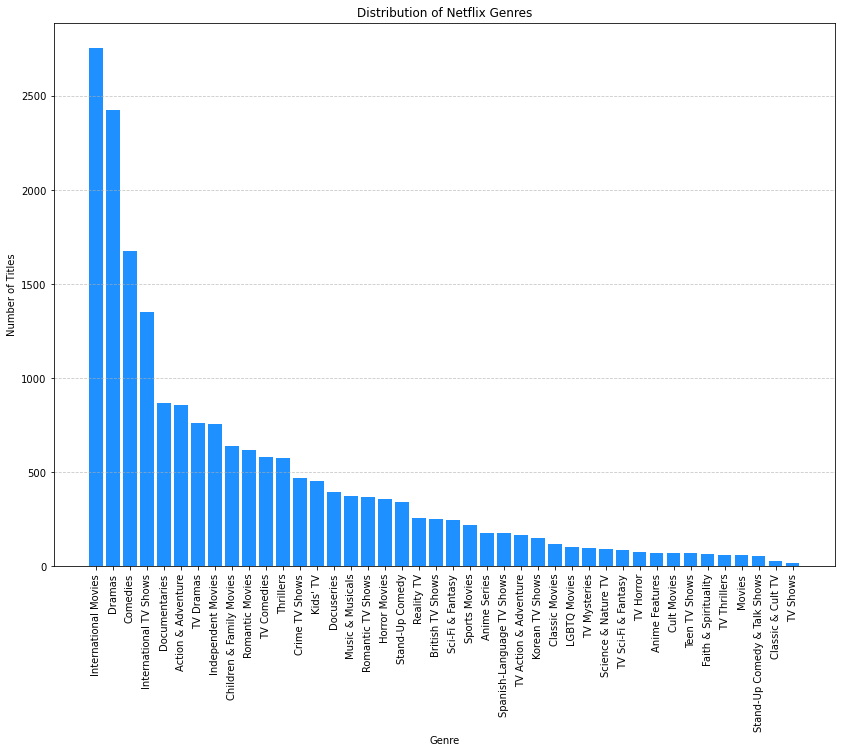

In [10]:
# Splitting genres and flattening the list
genres_series = netflix_titles_df['listed_in'].str.split(', ', expand=False).dropna()
genres_flat_list = [genre for sublist in genres_series for genre in sublist]

# Counting the occurrences of each genre
genres_counts = Counter(genres_flat_list)

# Converting to DataFrame for easier handling and sorting
genres_counts_df = pd.DataFrame(genres_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plotting the distribution of genres
plt.figure(figsize=(14, 10))
plt.bar(genres_counts_df['Genre'], genres_counts_df['Count'], color='dodgerblue')
plt.title('Distribution of Netflix Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The chart above illustrates the distribution of genres across Netflix titles, showcasing the number of titles associated with each genre. This visualization helps identify the most popular genres on the platform, indicating the diversity and focus of Netflix's content library.

## Text Analysis of Titles and Descriptions

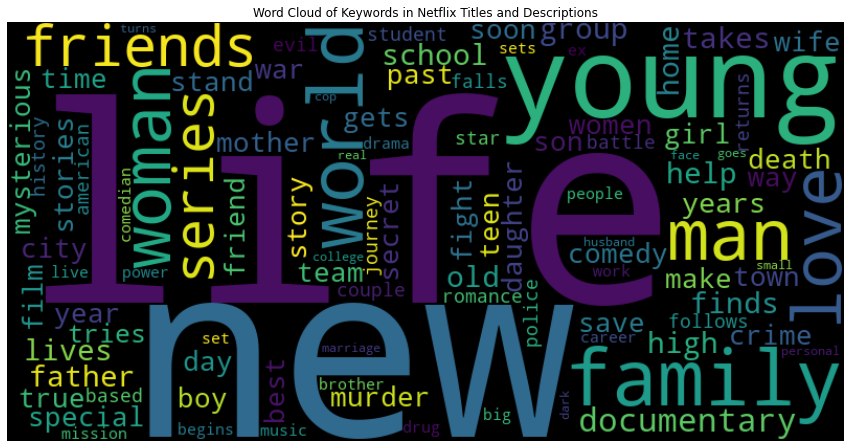

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# Preprocessing and tokenization
# Note: For a detailed analysis, further preprocessing might be required.
descriptions = netflix_titles_df['description'].dropna()

# Applying TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(descriptions)

# Summarizing the TF-IDF scores for each word
sum_tfidf = tfidf_matrix.sum(axis=0)
words_freq = [(word, sum_tfidf[0, idx]) for word, idx in tfidf_vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Creating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='black').generate_from_frequencies(dict(words_freq))

# Plotting the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Keywords in Netflix Titles and Descriptions')
plt.show()

The Word Cloud above visualizes the most relevant keywords found in the titles and descriptions of Netflix content, based on the TF-IDF scores. These keywords highlight the thematic elements and subjects that are frequently mentioned across the Netflix catalog, providing insights into the types of content that are prominent on the platform.
This analysis can serve as a foundation for content-based recommendation systems by identifying key terms and themes that resonate with viewers

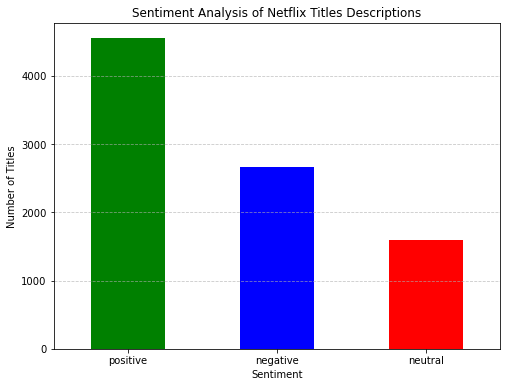

In [12]:
from textblob import TextBlob

# Applying sentiment analysis on the descriptions
sentiments = descriptions.apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorizing sentiments into positive, neutral, or negative
sentiment_categories = sentiments.apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

# Counting the occurrences of each sentiment category
sentiment_counts = sentiment_categories.value_counts()

# Plotting the distribution of sentiments
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of Netflix Titles Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart above represents the sentiment analysis of Netflix titles' descriptions, categorizing them into positive, neutral, or negative sentiments. This analysis reveals the overall emotional tone conveyed through the descriptions, with a noticeable distribution across the different sentiment categories.

The predominance of positive sentiment suggests that the descriptions are generally crafted to appeal and attract viewers by highlighting appealing aspects of the content. Neutral sentiments might indicate more factual or straightforward descriptions, while negative sentiments could be rare and possibly associated with certain genres or themes intended to evoke specific viewer emotions.

# Conclusion

This work underscores the power of data analysis in unraveling the strategic content decisions of a leading streaming service like Netflix. By dissecting the content catalog across various dimensions, we've not only appreciated the breadth and depth of Netflix's offerings but also recognized the potential for data-driven techniques to refine content discovery and personalization. The insights derived from this analysis could inform future content strategies, recommendation systems, and viewer engagement initiatives, demonstrating the critical role of analytics in the competitive streaming landscape.